In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv(r'E:\Projects\ChurnPrediction\TelcoCustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
df.shape

(7043, 21)

In [31]:
df.describe(percentiles=[0.01, 0.05, 0.1, .25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,0.0,0.00,0.00,1.0,1.0,1.000,1.00
tenure,7043.0,32.371149,24.559481,0.00,1.0,1.00,2.00,9.0,29.00,55.00,69.0,72.0,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.2,19.65,20.05,35.5,70.35,89.85,102.6,107.4,114.729,118.75


In [32]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [33]:
df['tenure'].nunique()

73

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

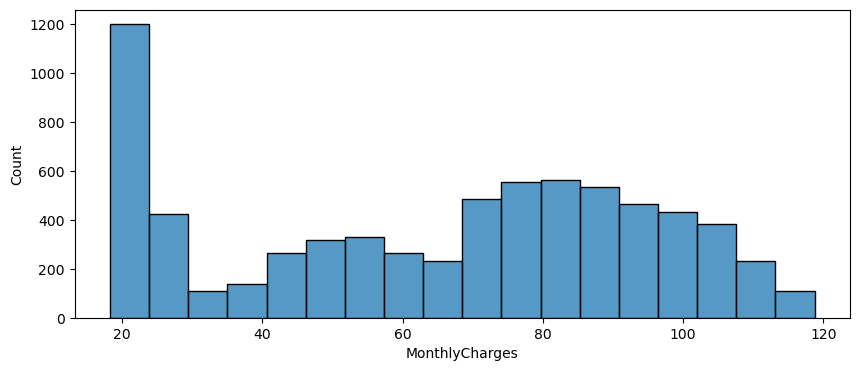

In [34]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='MonthlyCharges')

In [35]:
df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [38]:
cat_cols = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn']
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].nunique())


Column: customerID
7043

Column: gender
2

Column: Partner
2

Column: Dependents
2

Column: PhoneService
2

Column: MultipleLines
3

Column: InternetService
3

Column: OnlineSecurity
3

Column: OnlineBackup
3

Column: DeviceProtection
3

Column: TechSupport
3

Column: StreamingTV
3

Column: StreamingMovies
3

Column: Contract
3

Column: PaperlessBilling
2

Column: PaymentMethod
4

Column: TotalCharges
6531

Column: Churn
2


In [46]:
(df['TotalCharges']==' ').sum()

11